In [ ]:
#check if python is installed
try:
  !python --version
except:
  print("It does not look like python is installed")

Python 3.6.9


Importing Data

In [ ]:
pip install cloudmesh-common -U

In [ ]:
#set up enviroment
from cloudmesh.common.StopWatch import StopWatch
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn import metrics 
from sklearn.metrics import explained_variance_score
import seaborn as sns

In [ ]:
#load file
StopWatch.start("Code Execution")
StopWatch.start("Loading Dataset")
df =pd.read_csv("https://raw.githubusercontent.com/cybertraining-dsc/fa20-523-327/main/project/dataset/USvideos.csv")
StopWatch.stop("Loading Dataset")
StopWatch.status("Loading Dataset", True)

familiarize myself with the data

In [ ]:
StopWatch.start("Data Preparation")
df.info()
print("")
print("Shape: ", df.shape)

In [ ]:
#Check for null values
null = df.isna().sum()

for key in null.keys():
    if(null[key] > 0):
        print(key,":",null[key])

In [ ]:
#turn boolean labels into 1/0
df["comments_disabled"] = df["comments_disabled"].astype(int)
df["ratings_disabled"] = df["ratings_disabled"].astype(int)
df["video_error_or_removed"] = df["video_error_or_removed"].astype(int)

separate dates into respective columns

In [ ]:
#clean publish and date
df['publish_time'] = pd.to_datetime(df["publish_time"], format = '%Y-%m-%d')
df['trending_date'] = pd.to_datetime(df["trending_date"], format = '%y.%d.%m')

In [ ]:
#create new columns
df['td_month'] = df['trending_date'].dt.month
df['td_day'] = df['trending_date'].dt.day
df['td_year'] = df['trending_date'].dt.year
df['p_month'] = df['publish_time'].dt.month
df['p_day'] = df['publish_time'].dt.day
df['p_year'] = df['publish_time'].dt.year
StopWatch.stop("Data Preparation")
StopWatch.status("Prepare Data", True)

decision tree

In [ ]:
#drop fields that cannot be ran through model or relevant
df = df.drop(['trending_date','video_id', 'title', 'channel_title', 'publish_time', 'tags',
             'thumbnail_link', 'description'], axis = 'columns')

In [ ]:
#test
x = df[['category_id', 'likes', 'dislikes', 'comment_count', 
         'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'td_month',
         'td_day', 'td_year', 'p_month', 'p_day', 'p_year']]
y = df["views"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 33)

In [ ]:
DecisionTree_Class_Model = DecisionTreeRegressor()

In [ ]:
DecisionTree_Class_Model.fit(x_train, y_train)

In [ ]:
y_pred = DecisionTree_Class_Model.predict(x_test)
y_pred

In [ ]:
#evaulates model
explained_variance_score(y_test, y_pred)

In [ ]:
#plot specific videos, show different trends
#try to predict those videos
#explain why it works/ doesn't work
#try to look at videos through different categories
#divide up dataset by categories 
#plot video count by time of each category for discussion

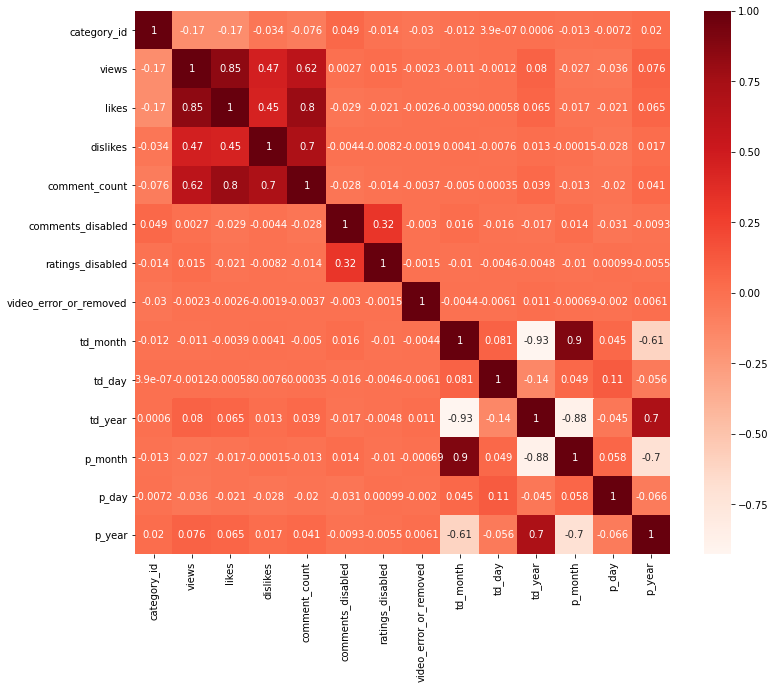

In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

strong correlation between likes, dislikes, and comment count with views

In [ ]:
#Selecting highly correlated features
cor_target = abs(cor["views"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

In [ ]:
#predicted vs acutal values
plt.figure(figsize = (12,10))
av = sns.kdeplot(y_test, color = "g", label = "Actual Values")
sns.kdeplot(y_pred, color = "r", label = "Predicted Values", ax = av)
plt.title("Prediction of Views")
plt.legend()
plt.show()
plt.close()

random forest

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 33)

In [ ]:
rf_Model = RandomForestRegressor()

In [ ]:
rf_Model.fit(x_train, y_train)

In [ ]:
y_pred = rf_Model.predict(x_test)
y_pred

In [ ]:
explained_variance_score(y_test, y_pred)

In [ ]:
#plotting random videos for comparison
df = pd.read_csv("USvideos.csv")
ef = df.sample()
print(ef)

In [ ]:
views = ef["views"]
ef['publish_time'] = pd.to_datetime(ef["publish_time"], format = '%Y-%m-%d')
ef['trending_date'] = pd.to_datetime(ef["trending_date"], format = '%y.%d.%m')
publish_time = ef['publish_time']
trending_date = ef['trending_date']

In [ ]:
plt.plot(views)

In [ ]:
plt.figure(figsize = (12,10))
sns.kdeplot(ef["views"], ef["publish_time"], color = "g", label = "test video")
plt.title("Test Case")
plt.show()
plt.close()

In [ ]:
StopWatch.stop("Code Execution")
StopWatch.status("Code Execution", True)
StopWatch.benchmark()

other statistical findings

In [ ]:
average views per video

In [ ]:
#average view per trending video
average = sum(df["views"]) / len(df["views"])

print("The average view per trending video is",str(round(average,2)))

The average view per trending video is 2360784.64


In [ ]:
#min max for views
views_lst = []
for views in df["views"]:
  views_lst.append(views)

print(min(views_lst))
print(max(views_lst))

549
225211923


How long does it take for a video to trend

Most common tags

In [ ]:
#find 10 most common tags
from collections import Counter
tag_lst = []

for tags in df["tags"]:
  tag_lst.append(tags)

c = Counter(tag_lst)
c.most_common(10)

  
  


[('[none]', 1535),
 ('ABC|"americanidol"|"idol"|"american idol"|"ryan"|"seacrest"|"ryan seacrest"|"katy"|"perry"|"katy perry"|"luke"|"bryan"|"luke bryan"|"lionel"|"richie"|"lionel richie"|"season 16"|"american idol XVI"|"television"|"ad"|"spring"|"2018"|"music"|"reality"|"competition"|"song"|"sing"|"audition"|"auditions"|"performance"|"live"|"fox"|"AI"|"hollywood"|"contestant"|"official"|"american"|"official american idol"|"hollywood week"|"hometown audition"',
  87),
 ('Jacksfilms|"Jack Douglass"|"YGS"|"YGS 100"|"YGS 50"|"The Best of Your Grammar Sucks"|"Your Grammar Sucks"|"YIAY"|"Yesterday I Asked You"|"Fidget Spinners"|"Emoji Movie"|"Kermit Sings"|"JackAsk"|"Jack Ask"|"Dubstep Solves Everything"|"Frozen 2"|"iPhone Parody"|"Apple Parody"',
  80),
 ('James Corden|"The Late Late Show"|"Colbert"|"late night"|"late night show"|"Stephen Colbert"|"Comedy"|"monologue"|"comedian"|"impressions"|"celebrities"|"carpool"|"karaoke"|"CBS"|"Late Late Show"|"Corden"|"joke"|"jokes"|"funny"|"funny vi

Most Common Category Ids

Cateogry Id List:

2 - Autos & Vehicles
1 -  Film & Animation
10 - Music
15 - Pets & Animals
17 - Sports
18 - Short Movies
19 - Travel & Events
20 - Gaming
21 - Videoblogging
22 - People & Blogs
23 - Comedy
24 - Entertainment
25 - News & Politics
26 - Howto & Style
27 - Education
28 - Science & Technology
29 - Nonprofits & Activism
30 - Movies
31 - Anime/Animation
32 - Action/Adventure
33 - Classics
34 - Comedy
35 - Documentary
36 - Drama
37 - Family
38 - Foreign
39 - Horror
40 - Sci-Fi/Fantasy
41 - Thriller
42 - Shorts
43 - Shows
44 - Trailers

In [ ]:
#category id
category_lst = []
for category in df["category_id"]:
  category_lst.append(category)

c = Counter(category_lst)
c.most_common(10)

Most Common Categories that trend are: Entertainment, Music, Howto & Style, Comedy, People & Blogs

Total Likes:Dislikes

In [ ]:
#likes

likes_lst = []
for likes in df["likes"]:
  likes_lst.append(likes)

likes_total = 0
for l in range(0, len(likes_lst)):
  likes_total = likes_total + likes_lst[l]

print(likes_total)

#dislikes

dislikes_lst = []
for dislikes in df['dislikes']:
  dislikes_lst.append(dislikes)

dislikes_total = 0
for d in range(0, len(dislikes_lst)):
  dislikes_total = dislikes_total + dislikes_lst[d]

print(dislikes_total)

#ratio

print("Total likes to dislikes ratio is 20:1 or",likes_total/dislikes_total)

3041147198
151978155
Total likes to dislikes ratio is 20:1 or 20.010423195359884


In [ ]:
#ratings disabled

df["ratings_disabled"].value_counts()



In [ ]:
#comments_disabled count
df["comments_disabled"].value_counts()

In [ ]:
#percentages
ratingsdisabled = 40780/40948
commentsdisabled = 40316/40948

print(ratingsdisabled)
print(commentsdisabled)

checking if certain channels are more likely to trend

In [ ]:
#channel count
channel_lst = []

for channel in df["channel_title"]:
  channel_lst.append(channel)

c = Counter(channel_lst)
c.most_common(10)

checking text within titles to see if there are bias words